In [489]:
import importlib

In [490]:
import copy
import numpy as np
import matplotlib.colors as mplcols
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [555]:
import PIPPET, utils
importlib.reload(PIPPET)
importlib.reload(utils)

<module 'utils' from '/Users/cannon/Documents/oscPATIPPET/utils.py'>

# Tempo-changing metronome

In [602]:
omegas, domega = np.linspace(1.2*2*np.pi, 2.4*2*np.pi, num=21, retstep = True)
print(domega)
print(1.2*2*np.pi/20)
(omegas[1:]+omegas[:-1])/2

0.37699111843077515
0.37699111843077515


array([ 7.72831793,  8.10530905,  8.48230016,  8.85929128,  9.2362824 ,
        9.61327352,  9.99026464, 10.36725576, 10.74424688, 11.12123799,
       11.49822911, 11.87522023, 12.25221135, 12.62920247, 13.00619359,
       13.3831847 , 13.76017582, 14.13716694, 14.51415806, 14.89114918])

In [582]:
p_ = PIPPET.PIPPETParams()
p_.dt = 0.0005
p_.overtime = .5

p_.mu_0 = 0
p_.V_0 = 1
p_.m_span = 40

p_.sigma_phi = .3 #.3
p_.sigma_omega = .4#.25#0.12

p_.omega_p = 2*np.pi/.8
p_.omega_p_tendency = 0#0.050


e_means   = np.array([0,])
e_vars    = np.array([0.0001,]) #np.array([0.006,])/(2*np.pi/.54)**2  #### .006
e_lambdas = np.array([0.1,])
lambda_0 = 0.00001

print(e_vars)

p_.tempo_scaling = True
p_.continuous_expectation = True





[0.0001]


In [583]:


## Adjust to a tempo drop and plot

p_g_down = copy.deepcopy(p_)

N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.54
tempo_mult = 1.2
e_times = np.arange(1, N_PULSES_0+1) * period_0

e_times = np.concatenate((e_times, np.arange(1, N_PULSES_1+1) *period_0*tempo_mult + e_times[-1]))
e_times

p_g_down.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')

m_g_down = PIPPET.gcPATIPPET(p_g_down, omegas=omegas, prior=None)
m_g_down.run()


TemplateParams(e_times=array([0.54 , 1.08 , 1.62 , 2.16 , 2.7  , 3.24 , 3.888, 4.536, 5.184,
       5.832, 6.48 ]), e_means=array([0]), e_vars=array([0.0001]), e_lambdas=array([0.1]), lambda_0=1e-05, label='')


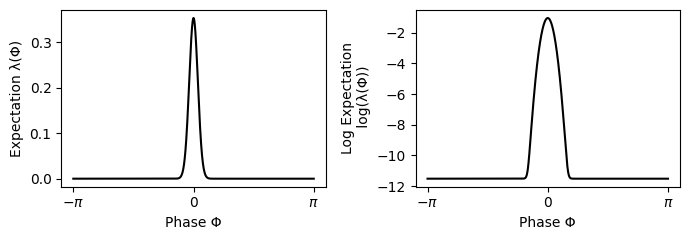

In [584]:
fig = utils._plot_template(m_g_down, 1.8*2*np.pi, figsize=(7,2.5))
print(m_g_down.streams[0].params)

fig.savefig('figures/single_template.svg', bbox_inches='tight');

[False False False ... False False False]
(array([], dtype=int64),)
[108.         107.99911718 107.99823462 ...  92.72910427  92.72910434
  92.7291044 ]


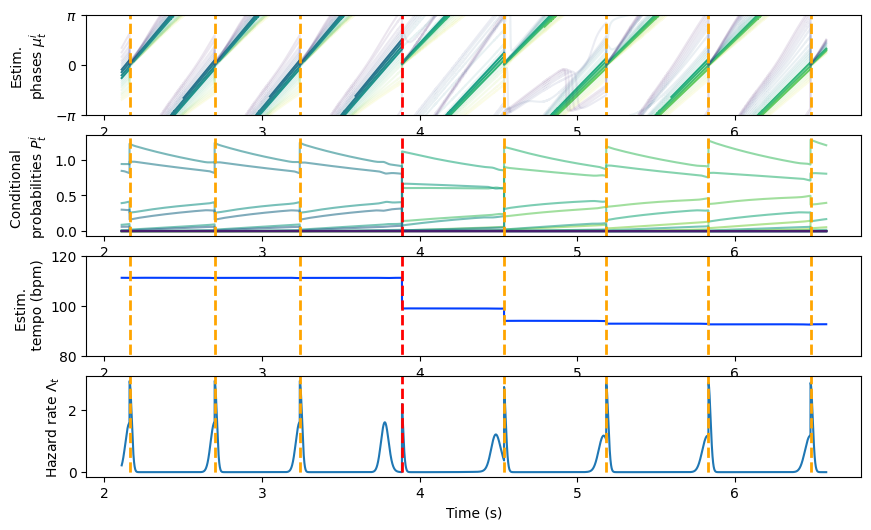

In [585]:
print(m_g_down.L_s<=0)
print(np.where(m_g_down.L_s<=0))
fig = utils.plot_gcPATIPPET(m_g_down, N_PULSES_0-3, N_PULSES_0,  N_PULSES_0+4, 'first event at new tempo', .1/domega, [80,120])#2*np.pi/.54])
fig.savefig('figures/gc_slowdown.svg', bbox_inches='tight');

In [586]:
## Adjust to a tempo raise and plot

p_g_up = copy.deepcopy(p_)

N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.65
tempo_mult = 1/1.2
e_times = np.arange(1, N_PULSES_0+1) * period_0

e_times = np.concatenate((e_times, np.arange(1, N_PULSES_1+1) *period_0 *tempo_mult + e_times[-1]))

p_g_up.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')

m_g_up= PIPPET.gcPATIPPET(p_g_up, omegas=omegas, prior=None)
m_g_up.run()


[108.         107.99911718 107.99823462 ... 110.96644258 110.96556734
 110.96467181]


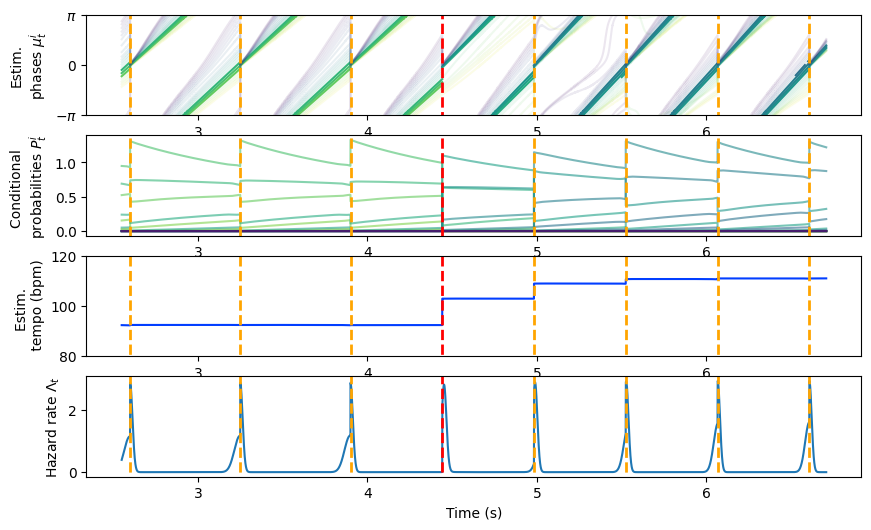

In [587]:

fig = utils.plot_gcPATIPPET(m_g_up, N_PULSES_0-3, N_PULSES_0,  N_PULSES_0+4, 'first event at new tempo', .1/domega, [80,120])
fig.savefig('figures/gc_speedup.svg', bbox_inches='tight');

In [553]:
p_v_up = copy.deepcopy(p_)

p_v_up.V_omega_0 = 10
p_v_up.S_0 = 0
p_v_up.omega_0 = 9.5



N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.65
tempo_mult = 1/1.2
e_times = np.arange(1, N_PULSES_0+1) * period_0

e_times = np.concatenate((e_times, np.arange(1, N_PULSES_1+1) *period_0 *tempo_mult + e_times[-1]))
p_v_up.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')

m_v_up= PIPPET.vcPATIPPET(p_v_up)

m_v_up.run()


[ 9.5         9.5         9.5        ... 11.44313035 11.44313035
 11.44313035]


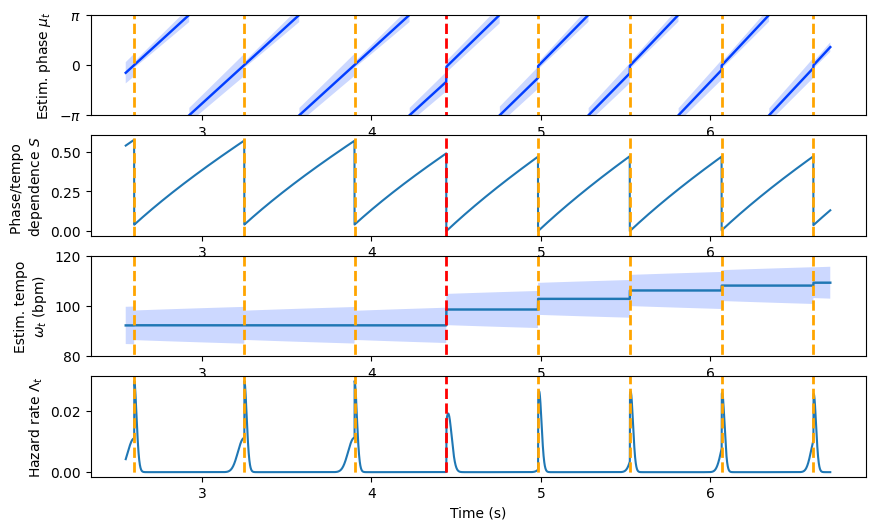

In [596]:
print(m_v_up.Omegas)
fig=utils.plot_vcPATIPPET(m_v_up,N_PULSES_0-3, N_PULSES_0,  N_PULSES_0+4, 'first event at new tempo', [80,120])
fig.savefig('figures/vc_speedup.svg', bbox_inches='tight');

In [557]:
p_v_down = copy.deepcopy(p_)

p_v_down.V_omega_0 = .1
p_v_down.S_0 = 0
p_v_down.omega_0 = 11.5

p_v_down.tempo_scaling = True

N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.54
tempo_mult = 1.2
e_times = np.arange(1, N_PULSES_0+1) * period_0

e_times = np.concatenate((e_times, np.arange(1, N_PULSES_1+1) *period_0*tempo_mult + e_times[-1]))
e_times

e_times = np.concatenate((e_times, np.arange(1, N_PULSES_1+1) *period_0 *tempo_mult + e_times[-1]))
print(e_times)
p_v_down.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')

m_v_down= PIPPET.vcPATIPPET(p_v_down)

m_v_down.run()

m_v_down.params.tempo_scaling

[0.54  1.08  1.62  2.16  2.7   3.24  3.888 4.536 5.184 5.832 6.48  7.128
 7.776 8.424 9.072 9.72 ]


True

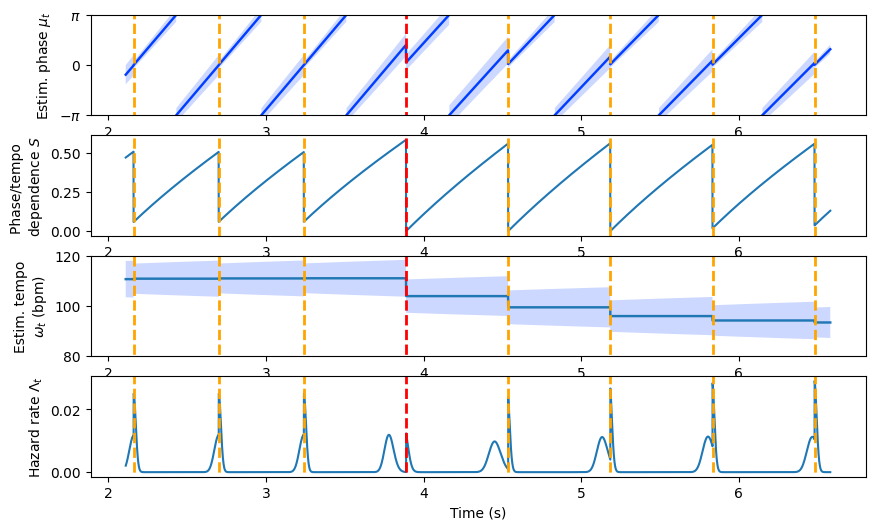

In [597]:
fig=utils.plot_vcPATIPPET(m_v_down,N_PULSES_0-3, N_PULSES_0,  N_PULSES_0+4, 'first event at new tempo', [80,120])
fig.savefig('figures/vc_slowdown.svg', bbox_inches='tight');

# Tempo-changing complex rhythm

In [589]:
lead_time = 1
rhythm = np.array([0, .5, 1.5, 3, 3.5, 4.5, 5, 6])
period_0 = 0.5
e_times = (np.concatenate((rhythm, rhythm+8, rhythm+16)) * period_0)+lead_time
print(e_times)


#strong_var = .01
strong_var = 0.0001
strong_lambda = .1

#med_var = .03
med_var = 0.0004
med_lambda = .003

e_means_sub   = np.array([0, np.pi])
e_vars_sub    = np.array([strong_var, med_var])  #### .006
e_lambdas_sub = np.array([strong_lambda,med_lambda])
lambda_0_sub = 0.00001#0.00001 !!!!!!

p_v_rhythm_up = copy.deepcopy(p_)

#p_v_rhythm.sigma_phi = 0.3
#p_v_rhythm.sigma_omega = .25#.25#0.12

p_v_rhythm_up.V_omega_0 = 1
p_v_rhythm_up.omega_0 = 10.5
p_v_rhythm_up.V_0 = 10
p_v_rhythm_up.S_0 = 0

p_v_rhythm_up.tempo_scaling = True

p_v_rhythm_up.add(e_times, e_means_sub, e_vars_sub, e_lambdas_sub, lambda_0_sub, '')

m_v_rhythm_up= PIPPET.vcPATIPPET(p_v_rhythm_up)

m_v_rhythm_up.run()





[ 1.    1.25  1.75  2.5   2.75  3.25  3.5   4.    5.    5.25  5.75  6.5
  6.75  7.25  7.5   8.    9.    9.25  9.75 10.5  10.75 11.25 11.5  12.  ]


TemplateParams(e_times=array([ 1.  ,  1.25,  1.75,  2.5 ,  2.75,  3.25,  3.5 ,  4.  ,  5.  ,
        5.25,  5.75,  6.5 ,  6.75,  7.25,  7.5 ,  8.  ,  9.  ,  9.25,
        9.75, 10.5 , 10.75, 11.25, 11.5 , 12.  ]), e_means=array([0.        , 3.14159265, 0.        ]), e_vars=array([1.e-04, 4.e-04, 1.e+02]), e_lambdas=array([1.e-01, 3.e-03, 1.e-05]), lambda_0=1e-05, label='')


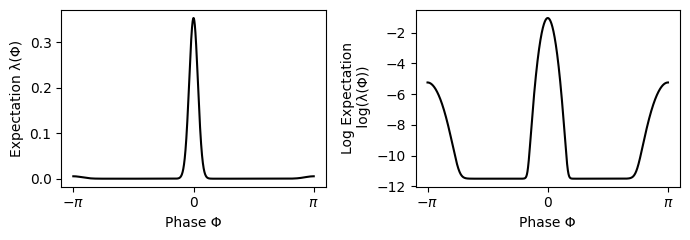

In [560]:
fig = utils._plot_template(m_v_rhythm_up, 1.8*2*np.pi)
print(m_v_rhythm_up.streams[0].params)
fig.savefig('figures/double_template.svg', bbox_inches='tight');

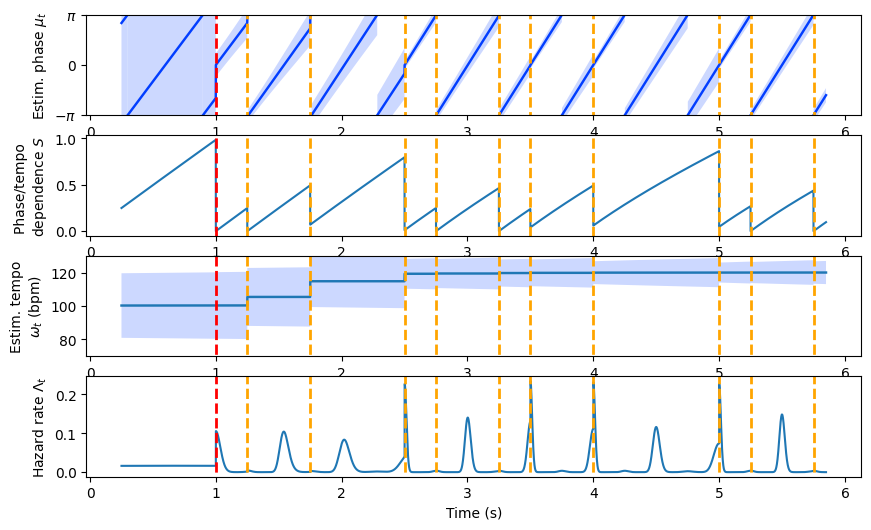

In [600]:
fig=utils.plot_vcPATIPPET(m_v_rhythm_up,0, 0,  10, '', [70,130], preroll = 1500, postroll = 200)
fig.savefig('figures/vc_rhythm_up.svg', bbox_inches='tight');

In [590]:
m_g_rhythm_up= PIPPET.gcPATIPPET(p_v_rhythm_up, omegas=omegas)

m_g_rhythm_up.run()

[108.         107.99962544 107.99925101 ... 120.11809237 120.11798866
 120.11793705]
0.4


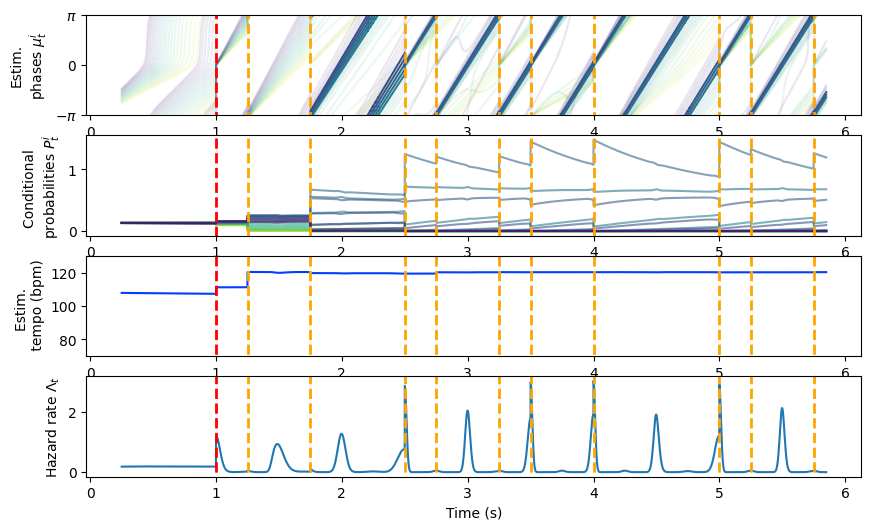

In [591]:
fig=utils.plot_gcPATIPPET(m_g_rhythm_up,0, 0,  10, '', .1/domega, [70,130], preroll = 1500, postroll = 200)
fig.savefig('figures/gc_rhythm_up.svg', bbox_inches='tight');
print(m_g_rhythm_up.params.sigma_omega)

In [592]:
period_0 = 0.7

e_times = (np.concatenate((rhythm, rhythm+8)) * period_0)+lead_time
print(e_times)
p_v_rhythm_down = copy.deepcopy(p_)

#p_v_rhythm_down.sigma_phi = 0.3
#p_v_rhythm_down.sigma_omega = .35#.25#0.12

p_v_rhythm_down.V_omega_0 = 1
p_v_rhythm_down.omega_0 = 10.5
p_v_rhythm_down.V_0 = 10
p_v_rhythm_down.S_0 = 0

p_v_rhythm_down.tempo_scaling = True
p_v_rhythm_down.add(e_times, e_means_sub, e_vars_sub, e_lambdas_sub, lambda_0_sub, '')

m_v_rhythm_down= PIPPET.vcPATIPPET(p_v_rhythm_down)

m_v_rhythm_down.run()

[ 1.    1.35  2.05  3.1   3.45  4.15  4.5   5.2   6.6   6.95  7.65  8.7
  9.05  9.75 10.1  10.8 ]


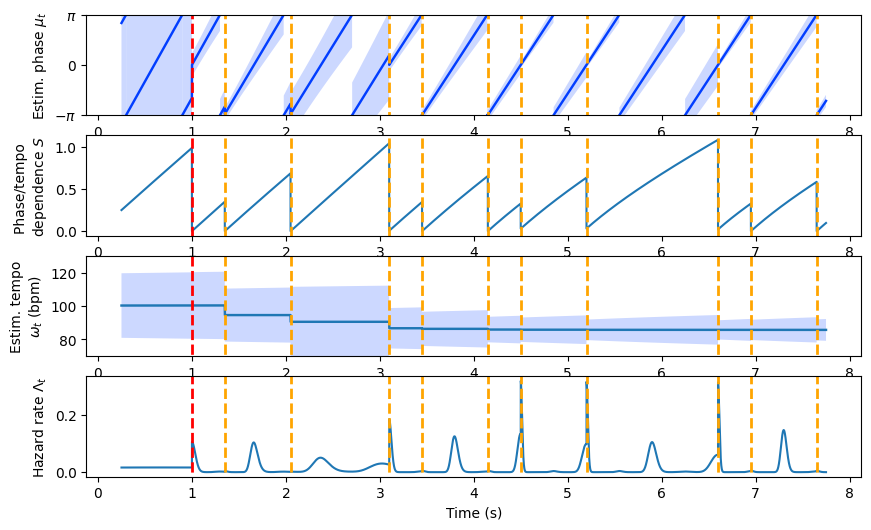

In [599]:
fig=utils.plot_vcPATIPPET(m_v_rhythm_down,0, 0,  10, 'first event at new tempo', [70,130], preroll = 1500, postroll = 200)
fig.savefig('figures/vc_rhythm_down.svg', bbox_inches='tight');

In [594]:
m_g_rhythm_down= PIPPET.gcPATIPPET(p_v_rhythm_down, omegas=omegas)

m_g_rhythm_down.run()

[108.         107.99962544 107.99925101 ...  85.87130153  85.87130893
  85.87131634]
0.4


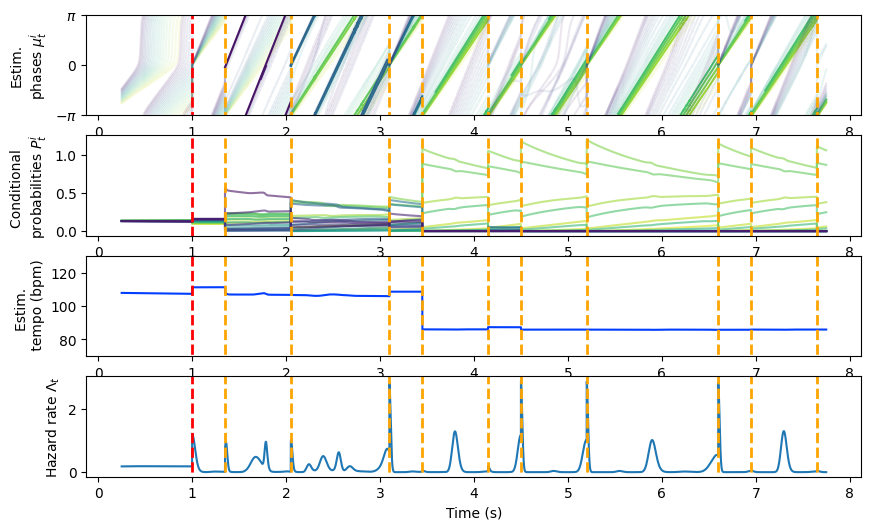

In [595]:
fig=utils.plot_gcPATIPPET(m_g_rhythm_down,0, 0,  10, 'first event at new tempo', .1/domega, [70,130], preroll = 1500, postroll = 200)
fig.savefig('figures/gc_rhythm_down.svg', bbox_inches='tight');
print(m_g_rhythm_down.params.sigma_omega)

# More tempo-changing sims (not in paper)

In [515]:
p_2 = PIPPET.PIPPETParams()
p_2.dt = 0.0005
p_2.overtime = .5
p_2.sigma_phi = 0.5
p_2.mu_0 = 0
p_2.V_0 = 1


p_2.eta_mu = 0.0
p_2.eta_V = 0.0


p_2.sigma_omega = .75#1#.25#0.12

p_2.omega_p = 2*np.pi/.54
p_2.omega_p_tendency = 0.00
p_2.m_span = 40
p_2.continuous_expectation = True

#strong_var = .01
strong_var = 0.0001
strong_lambda = .05

#med_var = .03
med_var = 0.0004
med_lambda = .02

#weak_var = .2
weak_var = 0.0025
weak_lambda = .02

e_means_2   = np.array([0, np.pi])
e_vars_2    = np.array([0.0001,.0004])
e_lambdas_2 = np.array([0.05,.02])
lambda_0_2 = 0.001

p_2.tempo_scaling = True



In [594]:

## Adjust to a tempo drop and plot

p_g_down_2 = copy.deepcopy(p_2)


N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.54
tempo_mult = 1.2
e_times_2 = np.arange(1, N_PULSES_0*2+1) * period_0/2

e_times_2 = np.concatenate((e_times_2, np.arange(1, N_PULSES_1*2+1) *period_0/2*tempo_mult + e_times_2[-1]))


p_g_down_2.add(e_times_2, e_means_2, e_vars_2, e_lambdas_2, lambda_0_2, '')

m_g_down_2 = PIPPET.gcPATIPPET(p_g_down_2, omegas=omegas, prior=None)
m_g_down_2.run()


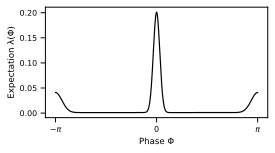

In [595]:
fig = utils._plot_template(m_g_down_2)
fig.savefig('figures/double_template.svg', bbox_inches='tight');

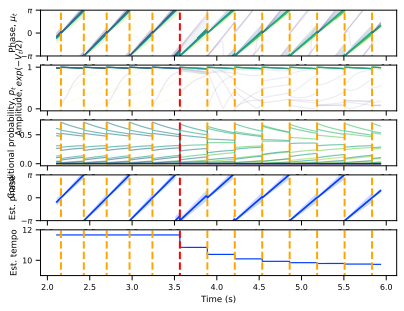

In [596]:
fig = utils.plot_gcPATIPPET(m_g_down_2, N_PULSES_0*2-5, N_PULSES_0*2,  N_PULSES_0*2+7, 'first event at new tempo', .1/domega, [9,12])
fig.savefig('figures/gc_slowdown_2.svg', bbox_inches='tight');

In [597]:
p_v_down_2 = copy.deepcopy(p_2)

p_v_down_2.V_omega_0 = .1
p_v_down_2.S_0 = 0
p_v_down_2.omega_0 = 11.5

p_v_down_2.tempo_scaling = True

N_PULSES_0 = 6
N_PULSES_1 = 5
period_0 = 0.54
tempo_mult = 1.2
e_times_2 = np.arange(1, N_PULSES_0*2+1) * period_0/2

e_times_2 = np.concatenate((e_times_2, np.arange(1, N_PULSES_1*2+1) *period_0/2*tempo_mult + e_times_2[-1]))

p_v_down_2.add(e_times_2, e_means_2, e_vars_2, e_lambdas_2, lambda_0_2, '')

m_v_down_2= PIPPET.vcPATIPPET(p_v_down_2)

m_v_down_2.run()


ComplexWarning: Casting complex values to real discards the imaginary part

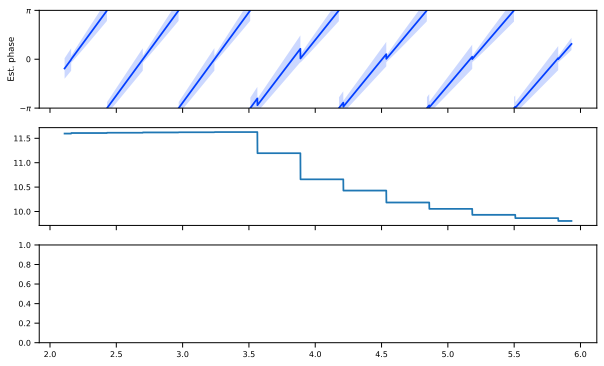

In [598]:
fig=utils.plot_vcPATIPPET(m_v_down_2,N_PULSES_0*2-5, N_PULSES_0*2,  N_PULSES_0*2+7, 'first event at new tempo', [9,12])
fig.savefig('figures/vc_slowdown_2.svg', bbox_inches='tight');

In [91]:
np.minimum(np.array([1,2,3]), 2)


array([1, 2, 2])